Курсова робота

Частина 1

Частина 2

About Dataset
This dataset provides comprehensive financial information for companies listed in the S&P 500 index. The dataset encompasses a range of fundamental financial metrics and attributes, making it a valuable resource for financial analysis, investment research, and market insights.

Features:
Symbol: The unique stock symbol or ticker identifier for each S&P 500 company.

Name: The official name or full corporate title of each company.

Sector: The sector to which the company belongs, categorizing it into specific industry groups within the S&P 500.

Price: The current trading price of the company's stock.

Price/Earnings: The price-to-earnings (P/E) ratio, a key valuation metric, indicating the relationship between the stock's price and its earnings per share.

Dividend Yield: The dividend yield, representing the ratio of the annual dividend payment to the stock's current price.

Earnings/Share: The earnings per share (EPS), a measure of a company's profitability, calculated as earnings divided by the number of outstanding shares.

52 Week Low: The lowest price at which the stock has traded over the past 52 weeks.

52 Week High: The highest price at which the stock has traded over the past 52 weeks.

Market Cap: The total market capitalization of the company, representing the product of the stock's current price and the total number of outstanding shares.

EBITDA: Earnings before interest, taxes, depreciation, and amortization, a measure of a company's operating performance.

Price/Sales: The price-to-sales ratio, which compares the stock's price to the company's revenue per share.

Price/Book: The price-to-book (P/B) ratio, comparing the stock's price to its book value per share, an indicator of the stock's relative value.

SEC Filings: Information regarding the company's filings with the U.S. Securities and Exchange Commission (SEC), providing transparency and compliance data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('constituents-financials_csv.csv')
df.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,181386347059,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,98765855553,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Symbol          505 non-null    object 
 1   Name            505 non-null    object 
 2   Sector          505 non-null    object 
 3   Price           505 non-null    float64
 4   Price/Earnings  503 non-null    float64
 5   Dividend Yield  505 non-null    float64
 6   Earnings/Share  505 non-null    float64
 7   52 Week Low     505 non-null    float64
 8   52 Week High    505 non-null    float64
 9   Market Cap      505 non-null    int64  
 10  EBITDA          505 non-null    float64
 11  Price/Sales     505 non-null    float64
 12  Price/Book      497 non-null    float64
 13  SEC Filings     505 non-null    object 
dtypes: float64(9), int64(1), object(4)
memory usage: 55.4+ KB


In [4]:
df.isnull().values.any()

True

In [5]:
df.isnull().sum()

Symbol            0
Name              0
Sector            0
Price             0
Price/Earnings    2
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        8
SEC Filings       0
dtype: int64

In [6]:
df = df.fillna(method='bfill')

In [7]:
df.isnull().values.any()

False

In [8]:
df.isnull().sum()

Symbol            0
Name              0
Sector            0
Price             0
Price/Earnings    0
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        0
SEC Filings       0
dtype: int64

In [9]:
list_to_show = ["Price", "Price/Earnings", "Price/Sales", "Price/Book"]
df_prices = df[list_to_show]
df_10 = df_prices.head(10)
df_10

,Price,Price/Earnings,Price/Sales,Price/Book
0,222.89,24.31,4.390271,11.34
1,60.24,27.76,3.575483,6.35
2,56.27,22.51,3.740480,3.19
3,108.48,19.41,6.291571,26.14
4,150.51,25.47,2.604117,10.62
5,65.83,31.80,10.595120,5.16
6,145.41,18.22,1.795347,3.55
7,185.16,52.31,13.092818,11.06
8,109.63,19.54,1.130106,2.51
9,11.22,187.00,2.109195,21.47


In [23]:
df_10_style = df_10.style

# Додаємо стилі до df_10
df_10_style.set_table_styles([ 
    {'selector': 'th.col_heading', 'props': 'background-color: #040487; color: white; text-align: center;'}, 
    {'selector': 'th.row_heading', 'props': 'background-color: #040487; color: white;'}, 
    {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.5em;'},
    {'selector': 'td', 'props': 'text-align: center; font-weight: bold;'},
    {'selector': 'th:not(.col_heading)', 'props': 'background-color: #040487;'}
                             ])

# Виділяємо максимальні та мінімальні значення
df_10_style.highlight_max(color='green').highlight_min(color='red')

# Відображаємо стилізовану таблицю
df_10_style

,Price,Price/Earnings,Price/Sales,Price/Book
0,222.890000,24.310000,4.390271,11.340000
1,60.240000,27.760000,3.575483,6.350000
2,56.270000,22.510000,3.740480,3.190000
3,108.480000,19.410000,6.291571,26.140000
4,150.510000,25.470000,2.604117,10.620000
5,65.830000,31.800000,10.595120,5.160000
6,145.410000,18.220000,1.795347,3.550000
7,185.160000,52.310000,13.092818,11.060000
8,109.630000,19.540000,1.130106,2.510000
9,11.220000,187.000000,2.109195,21.470000


In [11]:
dispersion = df.var(numeric_only=True)
dispersion

Price             1.807079e+04
Price/Earnings    1.694591e+03
Dividend Yield    2.363028e+00
Earnings/Share    3.236513e+01
52 Week Low       2.413739e+04
52 Week High      1.117788e+04
Market Cap        8.109033e+21
EBITDA            4.679304e+19
Price/Sales       1.197236e+01
Price/Book        7.913487e+03
dtype: float64

In [12]:
df_prices = df.select_dtypes(include=np.number)
df_normalized = (df_prices-df_prices.min())/(df_prices.max()-df_prices.min())
df_normalized

,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
0,0.122041,0.357454,0.184253,0.498336,0.122819,0.108870,0.168668,0.167134,0.212480,0.007720
1,0.031843,0.361925,0.090668,0.412067,0.029980,0.029079,0.010110,0.067114,0.171620,0.004163
2,0.029641,0.355121,0.150774,0.392094,0.028141,0.024890,0.123308,0.128012,0.179894,0.001910
3,0.058595,0.351104,0.197419,0.434119,0.057859,0.036093,0.221544,0.182078,0.307826,0.018270
4,0.081903,0.358957,0.135411,0.463939,0.075682,0.070622,0.119150,0.126819,0.122908,0.007207
...,...,...,...,...,...,...,...,...,...,...
500,0.037388,0.366046,0.092415,0.413870,0.034064,0.027777,0.012751,0.068547,0.129031,0.003422
501,0.040749,0.361264,0.141936,0.444938,0.038974,0.037858,0.030212,0.087102,0.308932,0.150812
502,0.062504,0.344508,0.062777,0.513454,0.061560,0.066429,0.027053,0.083767,0.151030,0.001340
503,0.026558,0.348927,0.116966,0.424549,0.023780,0.022462,0.009970,0.059998,0.182607,0.000649


In [13]:
list_to_show = ["Price", "Price/Earnings", "Price/Sales", "Price/Book"]
df_normilized_prices = df_normalized[list_to_show]
df_normilized_prices

,Price,Price/Earnings,Price/Sales,Price/Book
0,0.122041,0.357454,0.212480,0.007720
1,0.031843,0.361925,0.171620,0.004163
2,0.029641,0.355121,0.179894,0.001910
3,0.058595,0.351104,0.307826,0.018270
4,0.081903,0.358957,0.122908,0.007207
...,...,...,...,...
500,0.037388,0.366046,0.129031,0.003422
501,0.040749,0.361264,0.308932,0.150812
502,0.062504,0.344508,0.151030,0.001340
503,0.026558,0.348927,0.182607,0.000649


In [19]:
df_normilized_prices_100 = df_normilized_prices.head(100)
df_normilized_prices_50 = df_normilized_prices.head(50)

<Axes: >

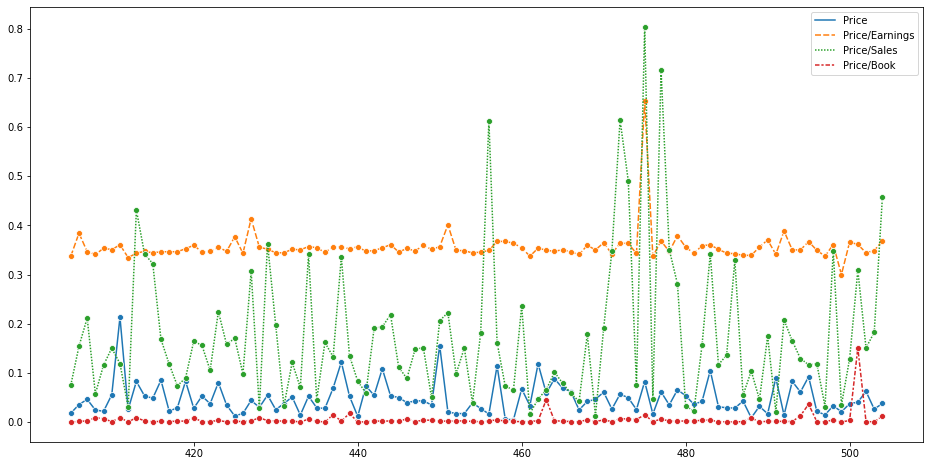

In [15]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=df_normilized_prices_100, marker = 'o')

<Axes: >

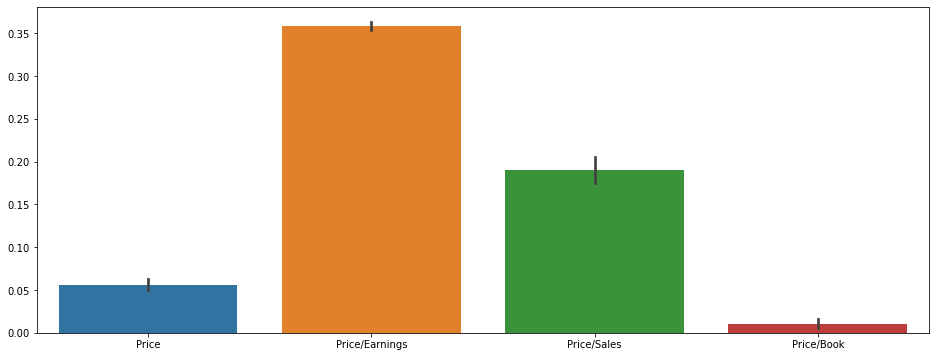

In [16]:
plt.figure(figsize=(16, 6))
sns.barplot(data=df_normilized_prices)

<Axes: >

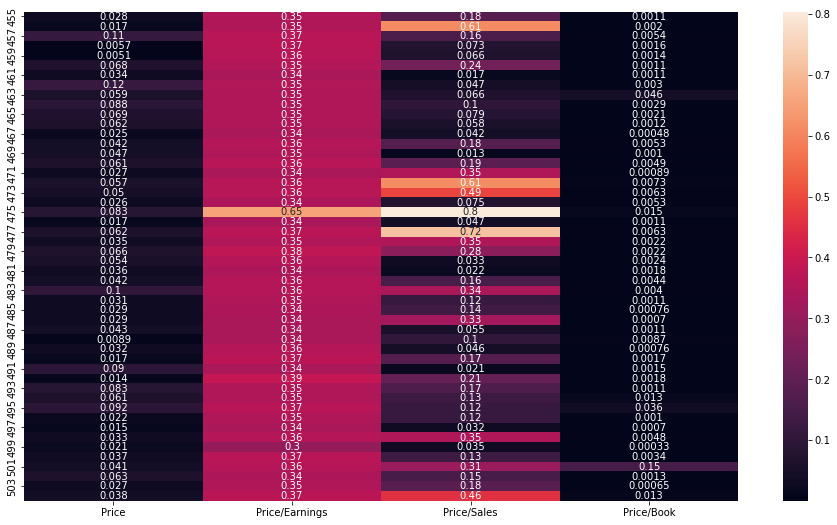

In [17]:
plt.figure(figsize=(16, 9))
sns.heatmap(data=df_normilized_prices_50, annot=True)

<Axes: ylabel='Count'>

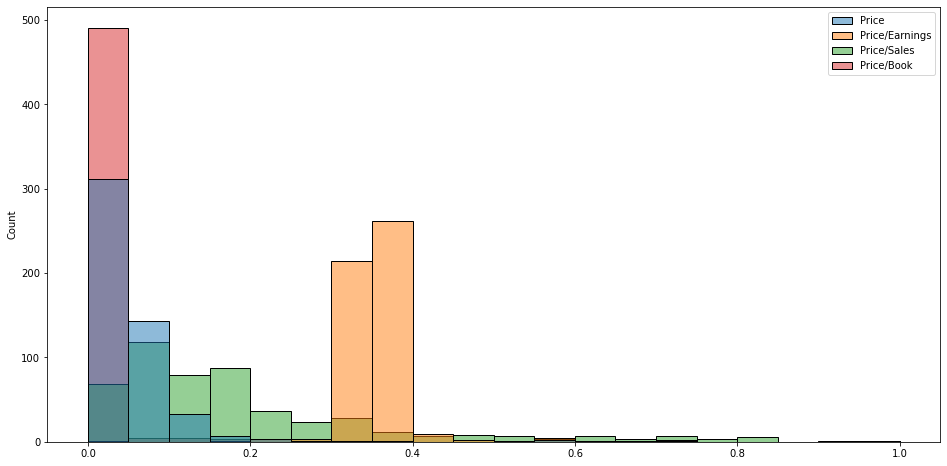

In [18]:
plt.figure(figsize=(16, 8))
sns.histplot(data=df_normilized_prices)